In [21]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
sales=pd.read_csv('Store.csv',index_col='Observation')

In [31]:
sales.head()

,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
Observation,,,,,,,,,
1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,66490
2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,39820
3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,54010
4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,53730
5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,46620


In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 1 to 932
Data columns (total 9 columns):
Dist_Taxi               919 non-null float64
Dist_Market             919 non-null float64
Dist_Metro              931 non-null float64
Store_Area              924 non-null float64
Items_Available         917 non-null float64
Parking                 932 non-null object
Coupon_Category         932 non-null object
Daily_Customer_Count    932 non-null int64
Store_Sales             932 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 72.8+ KB


In [38]:
sales.dtypes

Dist_Taxi               float64
Dist_Market             float64
Dist_Metro              float64
Store_Area              float64
Items_Available         float64
Parking                  object
Coupon_Category          object
Daily_Customer_Count      int64
Store_Sales               int64
dtype: object

In [33]:
sales.shape

(932, 9)

In [34]:
sales.isnull().sum()

Dist_Taxi               13
Dist_Market             13
Dist_Metro               1
Store_Area               8
Items_Available         15
Parking                  0
Coupon_Category          0
Daily_Customer_Count     0
Store_Sales              0
dtype: int64

In [35]:
sales.fillna(sales.median(),inplace=True)

In [36]:
sales.isnull().sum()

Dist_Taxi               0
Dist_Market             0
Dist_Metro              0
Store_Area              0
Items_Available         0
Parking                 0
Coupon_Category         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

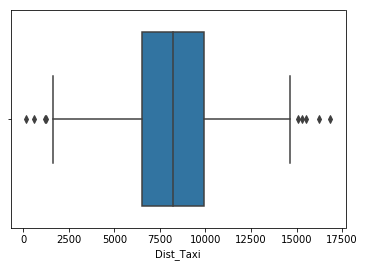

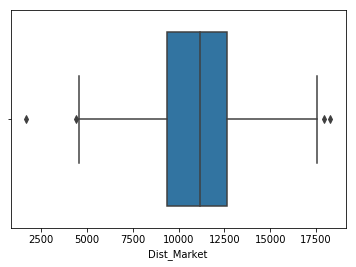

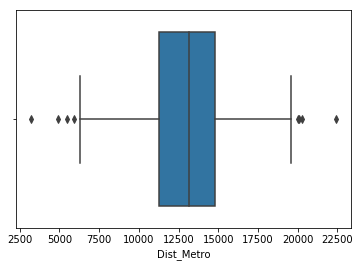

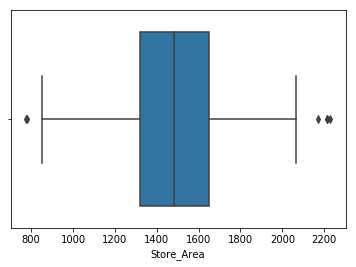

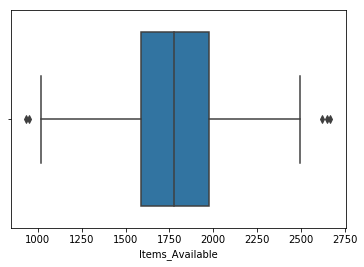

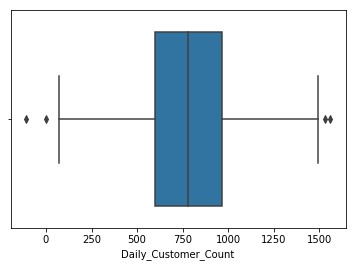

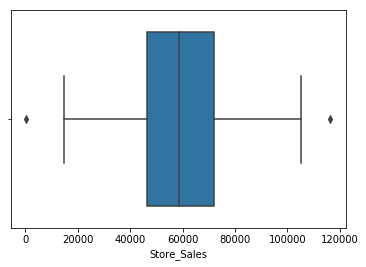

In [47]:
for i in sales.columns:
    if (sales[i].dtype != 'object'):
        sns.boxplot(sales[i])
        plt.show()

In [39]:
# let's create 2 datasets , one with oultiers and one without outliers

In [67]:
df1=sales    # with outliers

In [42]:
sales[sales['Store_Sales']==max(sales['Store_Sales'])]

,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
Observation,,,,,,,,,
361,20662.0,20945.0,23294.0,24300.0,12730.0,Covered,CAT B,1130,1500000


In [45]:
sales.drop(index=361,inplace=True)

In [46]:
sales.shape

(931, 9)

In [49]:
sales.Parking.value_counts()

Open            372
Not Provided    227
Covered         187
No Parking      145
Name: Parking, dtype: int64

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


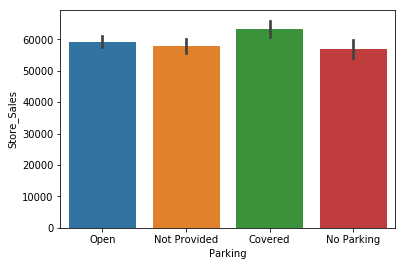

In [51]:
sns.barplot(sales.Parking,sales.Store_Sales)
plt.show()              # black bar is the confidence interval around the mean

In [61]:
sales[['Parking','Store_Sales']].groupby('Parking').agg('mean')

,Store_Sales
Parking,
Covered,63109.732620
No Parking,56994.620690
Not Provided,57747.048458
Open,59233.978495


# Anova TEST

In [70]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Store_Sales ~ Parking', data = sales).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)


             df        sum_sq       mean_sq         F    PR(>F)
Parking     3.0  4.033839e+09  1.344613e+09  4.553203  0.003557
Residual  927.0  2.737537e+11  2.953114e+08       NaN       NaN


In [74]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Store_Sales ~ Parking', data = df1).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)


             df        sum_sq       mean_sq         F    PR(>F)
Parking     3.0  4.033839e+09  1.344613e+09  4.553203  0.003557
Residual  927.0  2.737537e+11  2.953114e+08       NaN       NaN


In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(sales['Store_Sales'], sales['Parking']))

        Multiple Comparison of Means - Tukey HSD,FWER=0.05        
   group1       group2     meandiff     lower      upper    reject
------------------------------------------------------------------
  Covered     No Parking  -6115.1119 -11009.1371 -1221.0868  True 
  Covered    Not Provided -5362.6842  -9730.541  -994.8273   True 
  Covered        Open     -3875.7541  -7840.5021  88.9939   False 
 No Parking  Not Provided  752.4278   -3949.5059 5454.3614  False 
 No Parking      Open     2239.3578   -2090.6807 6569.3963  False 
Not Provided     Open      1486.93    -2238.1102 5211.9703  False 
------------------------------------------------------------------


In [80]:
# to check whether the there is a difference between Parking not provided and covered parking

In [82]:
data1=sales.Store_Sales[sales['Parking']=='Not Provided']
data2=sales.Store_Sales[sales['Parking']=='Covered']

In [97]:
t_statistic, p_value  =  stats.ttest_ind(data1,data2)
print('P Value %1.3f' % p_value)     #by default it will give result of the 2 sided t test ,
p_value/2 # result for one sided test

P Value 0.002


0.0008751761474936644

In [85]:
stats.ttest_ind(data1,data2)

Ttest_indResult(statistic=-3.1502380424373726, pvalue=0.0017503522949873288)

In [110]:
# now checking for coupon and parking
# H0=Coupon and parking are independent
# H1=coupon and parking are dependent
arr=pd.crosstab(sales['Coupon_Category'],sales['Parking']).values

In [111]:
pd.crosstab(sales['Coupon_Category'],sales['Parking'])

Parking,Covered,No Parking,Not Provided,Open
Coupon_Category,,,,
CAT A,75,51,82,121
CAT B,63,53,89,159
CAT C,49,41,56,92


In [113]:
stats.chi2_contingency(arr)

(5.598509055616617,
 0.4696314046542073,
 6,
 array([[ 66.08270677,  51.2406015 ,  80.21804511, 131.45864662],
        [ 73.11278195,  56.69172932,  88.7518797 , 145.44360902],
        [ 47.80451128,  37.06766917,  58.03007519,  95.09774436]]))

In [124]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(arr)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 5.59851 P value 0.469631 Degrees of freedom 6


In [115]:
sales[['Coupon_Category','Store_Sales']].groupby('Coupon_Category').agg('mean')

,Store_Sales
Coupon_Category,
CAT A,73998.662614
CAT B,55233.214286
CAT C,45205.504202


# 2 way anova

In [122]:
# H0 = u1 =u2=u3
# H1 = not H0
mod = ols('Store_Sales ~ Parking + Coupon_Category + Parking:Coupon_Category', data = sales).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                               sum_sq     df           F         PR(>F)
Parking                  3.023414e+09    3.0    6.161800   3.792762e-04
Coupon_Category          1.233702e+11    2.0  377.147746  2.581362e-120
Parking:Coupon_Category  7.474572e+07    6.0    0.076167   9.983139e-01
Residual                 1.503087e+11  919.0         NaN            NaN


In [123]:
# from the above we can understand that there is no interaction term as the p value is less than 0.05

In [129]:
sales[['Parking','Coupon_Category','Store_Sales']].groupby(['Coupon_Category','Parking']).agg('mean')

Store_Sales
Coupon_Category Parking                   
CAT A           Covered       77047.333333
                No Parking    71999.607843
                Not Provided  72015.975610
                Open          74295.206612
CAT B           Covered       58140.793651
                No Parking    53021.886792
                Not Provided  53213.595506
                Open          55948.742138
CAT C           Covered       48165.306122
                No Parking    43465.365854
                Not Provided  44058.214286
                Open          45102.934783

In [141]:
pd.crosstab(sales['Coupon_Category'],sales['Parking'],aggfunc='mean',values=sales['Store_Sales'])

Parking,Covered,No Parking,Not Provided,Open
Coupon_Category,,,,
CAT A,77047.333333,71999.607843,72015.975610,74295.206612
CAT B,58140.793651,53021.886792,53213.595506,55948.742138
CAT C,48165.306122,43465.365854,44058.214286,45102.934783


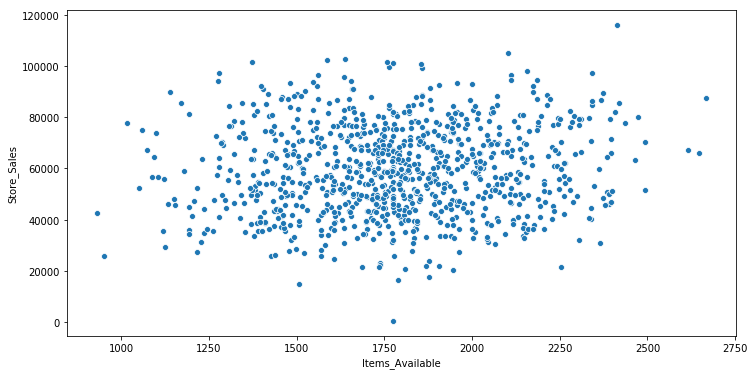

In [146]:
plt.figure(figsize=(12,6))
sns.scatterplot(sales['Items_Available'],sales['Store_Sales'])

In [138]:
sales['Items_Available'].median()

1774.0

In [144]:
sales_le=sales[sales['Items_Available']>=1774].Store_Sales
sale_ge=sales[sales['Items_Available']<1774].Store_Sales

In [148]:
# T Test for items available
# H0=sales doesnot depends on items
# H1=sales depends on items
t_statistic, p_value  =  stats.ttest_ind(sales_le,sale_ge)
print('P Value %1.3f' % p_value)    


P Value 0.146


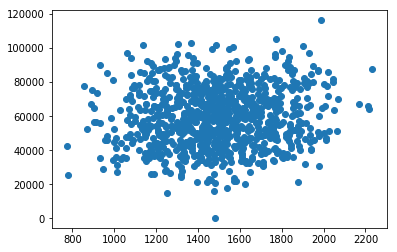

In [149]:
plt.scatter(sales.Store_Area,sales.Store_Sales)

In [151]:
sales['Store_Area'].median()

1480.5

In [164]:
sales_le=sales[sales['Store_Area']>=1480.5].Store_Sales
sale_ge=sales[sales['Store_Area']<1480.5].Store_Sales

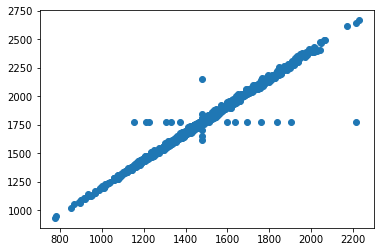

In [165]:
plt.scatter(sales.Store_Area,sales.Items_Available)

In [166]:
t_statistic, p_value  =  stats.ttest_ind(sales_le,sale_ge)
print('P Value %1.3f' % p_value)    


P Value 0.055


In [167]:
from sklearn.linear_model import LinearRegression

In [174]:
x=sales.Store_Area
y=sales.Store_Sales

In [176]:
lr=LinearRegression()
lr.fit(pd.DataFrame(x),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [177]:
from statsmodels.api import add_constant

In [178]:
x2=add_constant(x)
log=sm.OLS(y,x2)
result=log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.568
Date:                Thu, 21 Feb 2019   Prob (F-statistic):            0.00204
Time:                        15:14:09   Log-Likelihood:                -10400.
No. Observations:                 931   AIC:                         2.080e+04
Df Residuals:                     929   BIC:                         2.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.887e+04   3417.878     14.299      0.0

In [179]:
# Since P value is 0.002 is less than 0.05,therefore, it(Store_Area) is a significant variable
# if area goes up by one unit then sales would go up by 7 units

In [180]:
sales.head()

,Dist_Taxi,Dist_Market,Dist_Metro,Store_Area,Items_Available,Parking,Coupon_Category,Daily_Customer_Count,Store_Sales
Observation,,,,,,,,,
1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,66490
2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,39820
3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,54010
4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,53730
5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,46620


In [190]:
sales=pd.get_dummies(sales,drop_first=True)

In [192]:
x=sales.Items_Available
y=sales.Store_Sales

In [193]:
lr=LinearRegression()
lr.fit(pd.DataFrame(x),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [194]:
x2=add_constant(x)
log=sm.OLS(y,x2)
result=log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.157
Date:                Thu, 21 Feb 2019   Prob (F-statistic):            0.00439
Time:                        15:47:21   Log-Likelihood:                -10401.
No. Observations:                 931   AIC:                         2.081e+04
Df Residuals:                     929   BIC:                         2.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.956e+04   3455.688     

In [184]:
# Since P value is 0.004 is less than 0.05,therefore, it(Items_Available) is a significant variable
# if Items_Available goes up by one unit then sales would go up by 5 units

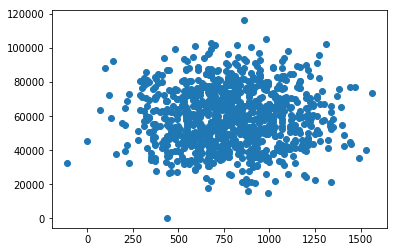

In [195]:
plt.scatter(sales.Daily_Customer_Count,sales.Store_Sales)

In [188]:
x=sales.iloc[:,0:3]
y=sales.Store_Sales
lr=LinearRegression()
lr.fit(pd.DataFrame(x),y)
x2=add_constant(x)
log=sm.OLS(y,x2)
result=log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.074
Date:                Thu, 21 Feb 2019   Prob (F-statistic):           0.000428
Time:                        15:30:38   Log-Likelihood:                -10396.
No. Observations:                 931   AIC:                         2.080e+04
Df Residuals:                     927   BIC:                         2.082e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.685e+04   3117.325     15.028      

In [196]:
x=sales.drop(columns='Store_Sales',axis=1)
y=sales.Store_Sales
lr=LinearRegression()
lr.fit(pd.DataFrame(x),y)
x2=add_constant(x)
log=sm.OLS(y,x2)
result=log.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     79.28
Date:                Thu, 21 Feb 2019   Prob (F-statistic):          5.04e-125
Time:                        15:47:32   Log-Likelihood:                -10094.
No. Observations:                 931   AIC:                         2.021e+04
Df Residuals:                     919   BIC:                         2.027e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.599e+